# APS1070
#### Basic Principles and Models - Lab 1
**Deadline: Jan 24, 23:59 - 10 points**

Name: **Shashank Sree Kumar Iyer**

Student ID: **1004859806**

##**Marking Scheme:**

This project is worth **10 marks** of your final grade.

**One (1) mark** of the lab is dedicated to **vectorized coding**. If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases loops are inevitable).

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you to complete your tutorial (Although no mark is assigned to the **tutorial** compeleting that section is **mandatory**). 

**The exercise** section is worth **9 points**.


##Tutorial
In this lab, we will be using the popular machine learning library [scikit-learn](https://scikit-learn.org/stable/) in tandem with a popular scientific computing library in Python, [NumPy](https://www.numpy.org/), to investigate basic machine learning principles and models. The topics that will be covered in this lab include:
* Introduction to scikit-learn and NumPy
* Data preparation and cleaning with Pandas
* Exploratory data analysis (EDA)
* Nearest neighbors classification algorithm

*Note:* Some other useful Python libraries include [matplotlib](https://matplotlib.org/) (for plotting/graphing) and [Pandas](https://pandas.pydata.org/) (for data analysis), though we won't be going into detail on these in this bootcamp. 

##### Jupyter Notebooks
This lab will be using [Jupyter Notebooks](https://jupyter.org/) as a Python development environment. Hopefully you're somewhat familiar with them. Write your code in *cells* (this is a cell!) and execute your code by pressing the *play* button (up top) or by entering *ctrl+enter*. To format a cell for text, you can select "Markdown" from the dropdown - the default formatting is "Code", which will usually be what you want.

#### Getting started
Let's get started. First, we're going to test that we're able to import the required libraries.  
**>> Run the code in the next cell** to import scikit-learn and NumPy.

In [1]:
import numpy as np
import sklearn 

### NumPy Basics

Great. Let's move on to our next topic: getting a handle on NumPy basics. You can think of NumPy as sort of like a MATLAB for Python (if that helps). The main object is multidimensional arrays, and these come in particularly handy when working with data and machine learning algorithms.

Let's create a 2x4 array containing the numbers 1 through 8 and conduct some basic operations on it.  
**>> Run the code in the next cell to create and print the array.***

In [2]:
array = np.arange(8).reshape(2,4)
array

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

We can access the shape, number of dimensions, data type, and number of elements in our array as follows:  
*(Tip: use "print()" when you want a cell to output more than one thing, or you want to append text to your output, otherwise the cell will output the last object you call, as in the cell above)*

In [3]:
print ("Shape:", array.shape)
print ("Dimensions:", array.ndim)
print ("Data type:" , array.dtype.name)
print ("Number of elements:", array.size)

Shape: (2, 4)
Dimensions: 2
Data type: int32
Number of elements: 8


If we have a Python list containing a set of numbers, we can use it to create an array:  
*(Tip: if you click on a function call, such as array(), and press "shift+tab" the Notebook will provide you all the details of the function)*

In [4]:
mylist = [0, 1, 1, 2, 3, 5, 8, 13, 21]
myarray = np.array(mylist)
myarray

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21])

And we can do it for nested lists as well, creating multidimensional NumPy arrays:

In [5]:
my2dlist = [[1,2,3],[4,5,6]]
my2darray = np.array(my2dlist)
my2darray

array([[1, 2, 3],
       [4, 5, 6]])

We can also index and slice NumPy arrays like we would do with a Python list or another container object as follows:

In [6]:
array = np.arange(10)
print ("Originally: ", array)
print ("First four elements: ", array[:4])
print ("After the first four elements: ", array[4:])
print ("The last element: ", array[-1])

Originally:  [0 1 2 3 4 5 6 7 8 9]
First four elements:  [0 1 2 3]
After the first four elements:  [4 5 6 7 8 9]
The last element:  9


And we can index/slice multidimensional arrays, too.

In [7]:
array = np.array([[1,2,3],[4,5,6]])
print ("Originally: ", array)
print ("First row only: ", array[0])
print ("First column only: ", array[:,0])

Originally:  [[1 2 3]
 [4 5 6]]
First row only:  [1 2 3]
First column only:  [1 4]


#### Sneak preview

Often, when designing a machine learning classifier, it can be useful to compare an array of predictions (0 or 1 values) to another array of true values. We can do this pretty easily in NumPy to compute the *accuracy* (e.g., the number of values that are the same), for example, as follows:

In [8]:
true_values = [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
predictions = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

true_values_array = np.array(true_values)
predictions_array = np.array(predictions)

accuracy = np.sum(true_values_array == predictions_array) / true_values_array.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  70.0 %


In the previous cell, we took two Python lists, converted them to NumPy arrays, and then used a combination of np.sum() and .size to compute the accuracy (proportion of elements that are pairwise equal). A tiny bit more advanced, but demonstrates the power of NumPy arrays.

You'll notice we didn't used nested loops to conduct the comparison, but instead used the np.sum() function. This is an example of a vectorized operation within NumPy that is much more efficient when dealing with large datasets.

### Pandas basics

Pandas is an incredibly useful library that allows us to work with large datasets in Python. It contains myriad useful tools, and is highly compatible with other libraries like Scikit-learn, so you don't have to spend any time getting the two to play nicely together.

First we are going to load a dataset with Pandas:

In [9]:
!pip install wget

In [10]:
import wget

wget.download(
    'https://github.com/alexwolson/APS1070_data/raw/master/arabica_data.csv',
    'arabica_data.csv'
)

100% [........................................................] 386988 / 386988

'arabica_data (5).csv'

In [11]:
import pandas as pd

df = pd.read_csv('arabica_data.csv')

With Pandas, the main object we work with is referred to as a _DataFrame_ (hence calling our object here df). A DataFrame stores our dataset in a way that immediately gives us a lot of power to interact with it. If you just put the DataFrame in a cell on its own, you instantly get a clear, easy to read preview of the data you have:

In [12]:
df

,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,...,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
0,0,8.75,8.67,8.67,60 kg,8.42,8.50,0,0,10.00,...,METAD PLC,guji-hambela,Arabica,10.00,10.00,NaN,2200.00,1950.00,2075.00,90.58
1,1,8.58,8.50,8.75,60 kg,8.42,8.42,0,1,10.00,...,METAD PLC,guji-hambela,Arabica,10.00,10.00,Other,2200.00,1950.00,2075.00,89.92
2,2,8.42,8.42,8.42,1,8.42,8.33,0,0,10.00,...,NaN,NaN,Arabica,10.00,10.00,Bourbon,1800.00,1600.00,1700.00,89.75
3,3,8.42,8.42,8.17,60 kg,8.25,8.50,0,2,10.00,...,Yidnekachew Dabessa Coffee Plantation,oromia,Arabica,10.00,10.00,NaN,2200.00,1800.00,2000.00,89.00
4,4,8.50,8.25,8.25,60 kg,8.33,8.42,0,2,10.00,...,METAD PLC,guji-hambela,Arabica,10.00,10.00,Other,2200.00,1950.00,2075.00,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1306,6.50,6.17,7.00,1 kg,6.17,6.67,0,4,0.00,...,Omar Acosta,marcala,Arabica,8.00,8.00,Catuai,1450.00,1450.00,1450.00,68.33
1307,1307,7.42,6.25,7.08,2 kg,6.75,7.25,0,20,6.00,...,JUAN CARLOS GARCÍA LOPEZ,juchique de ferrer,Arabica,10.00,10.00,Bourbon,900.00,900.00,900.00,67.92
1308,1308,6.67,6.42,6.75,69 kg,6.67,7.08,8,16,6.00,...,COEB Koperativ Ekselsyo Basen,"department d'artibonite , haiti",Arabica,6.00,9.33,Typica,350.00,350.00,350.00,63.08
1309,1309,6.25,6.33,7.25,1 kg,6.08,6.42,1,5,1.33,...,Teófilo Narváez,jalapa,Arabica,6.00,6.00,Caturra,1100.00,1100.00,1100.00,59.83


But even though this is printed out well, the dataset is a bit too large for this view to be anything but overwhelming. Luckily, Pandas allows us to easily get some summary statistics about our data.

In [13]:
df.describe()

,Unnamed: 0,Acidity,Aftertaste,Aroma,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Cupper Points,Flavor,Moisture,Number of Bags,Sweetness,Uniformity,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1084.000000,1084.000000,1084.000000,1311.000000
mean,655.000000,7.538764,7.403158,7.569527,7.523288,7.523387,0.450038,3.626240,9.83312,7.502441,7.523539,0.088963,153.678108,9.910900,9.839497,1808.751552,1759.456703,1784.104128,82.148825
std,378.597412,0.319773,0.349945,0.315930,0.349174,0.293089,2.017571,5.482857,0.77135,0.428989,0.341817,0.047907,129.760079,0.454824,0.491508,8767.192330,8767.851565,8767.021485,2.893505
min,0.000000,5.250000,6.170000,5.080000,6.080000,5.250000,0.000000,0.000000,0.00000,5.170000,6.080000,0.000000,0.000000,1.330000,6.000000,1.000000,1.000000,1.000000,43.130000
25%,327.500000,7.330000,7.250000,7.420000,7.330000,7.330000,0.000000,0.000000,10.00000,7.250000,7.330000,0.090000,14.000000,10.000000,10.000000,1100.000000,1100.000000,1100.000000,81.170000
50%,655.000000,7.500000,7.420000,7.580000,7.500000,7.500000,0.000000,2.000000,10.00000,7.500000,7.580000,0.110000,170.000000,10.000000,10.000000,1350.000000,1310.640000,1310.640000,82.500000
75%,982.500000,7.750000,7.580000,7.750000,7.750000,7.670000,0.000000,4.000000,10.00000,7.750000,7.750000,0.120000,275.000000,10.000000,10.000000,1650.000000,1600.000000,1600.000000,83.670000
max,1310.000000,8.750000,8.670000,8.750000,8.750000,8.580000,31.000000,55.000000,10.00000,10.000000,8.830000,0.280000,1062.000000,10.000000,10.000000,190164.000000,190164.000000,190164.000000,90.580000


Let's say we want to zero in on a single column. This is done the same way that you access a dictionary entry:

In [14]:
df['Species']

0       Arabica
1       Arabica
2       Arabica
3       Arabica
4       Arabica
         ...   
1306    Arabica
1307    Arabica
1308    Arabica
1309    Arabica
1310    Arabica
Name: Species, Length: 1311, dtype: object

Using this method of column access on its own returns a `series` object - think of this as a DataFrame with only one column. If you want to get the raw values however, you can simply specify this by adding `.values` after your entry. Using this, and by putting the object in a `Set` (which does not allow duplicate entries), we can quickly see all of the possible values for any column:

In [15]:
set(df['Variety'].values)

{'Arusha',
 'Blue Mountain',
 'Bourbon',
 'Catimor',
 'Catuai',
 'Caturra',
 'Ethiopian Heirlooms',
 'Ethiopian Yirgacheffe',
 'Gesha',
 'Hawaiian Kona',
 'Java',
 'Mandheling',
 'Marigojipe',
 'Moka Peaberry',
 'Mundo Novo',
 'Other',
 'Pacamara',
 'Pacas',
 'Pache Comun',
 'Peaberry',
 'Ruiru 11',
 'SL14',
 'SL28',
 'SL34',
 'Sulawesi',
 'Sumatra',
 'Sumatra Lintong',
 'Typica',
 'Yellow Bourbon',
 nan}

You may notice that the final entry in this set isn't like the others - it's `nan`, which in Pandas denotes a missing entry. When working with real world datasets it's very common for entries to be missing, and there are a variety of ways of approaching a problem like this. For now, though, we are simply going to tell Pandas to drop any row that has a missing column, using the `dropna()` method.

In [16]:
df_clean = df.dropna()

**YOUR TURN** How many entries did we lose by dropping all `nan`s?

* What percentage of entries are left in `df_clean`? **58.73%**
* What column had the highest number of `nan` entries? (This can be done in one line - use Google!) **Farm Name, with a count of 356 values**

In [17]:
### Your code here
unclean_rows = df.shape[0]
clean_rows = df_clean.shape[0]
percentage_left = ((unclean_rows - clean_rows)/unclean_rows)*100
print("%.2f" % percentage_left, "%")


null_columns = df.columns[df.isnull().any()]

print('Highest number of null entries in column:', df[null_columns].isnull().sum().idxmax(), ', with a count of:', df[null_columns].isnull().sum().max())


58.73 %
Highest number of null entries in column: Farm Name , with a count of: 356


As you perform this analysis, you will probably notice that we've lost _quite a bit_ of our original data by simply dropping the `nan` values. There is another approach that we can examine, however. Instead of dropping the missing entries entirely, we can _impute_ their value using the data we do have. For a single column we can do this like so:

In [18]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    verbose=1
)

imp.fit(
    df['altitude_mean_meters'].values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

df['altitude_mean_meters_imputed'] = imp.transform(df['altitude_mean_meters'].values.reshape((-1,1)))

In [19]:
df[['altitude_mean_meters','altitude_mean_meters_imputed']].head(10)

,altitude_mean_meters,altitude_mean_meters_imputed
0,2075.0,2075.000000
1,2075.0,2075.000000
2,1700.0,1700.000000
3,2000.0,2000.000000
4,2075.0,2075.000000
5,NaN,1784.104128
6,NaN,1784.104128
7,1635.0,1635.000000
8,1635.0,1635.000000
9,1822.5,1822.500000


OK, great! Now we have replaced the useless NaN values with the average height. While this obviously isn't as good as original data, in a lot of situations this can be a step up from losing rows entirely. 

Sophisticated analysis can be done in only a few lines using Pandas. Let's say that we want to get the average coffee rating by country. First, we can use the `groupby` method to automatically collect the results by country. Then, we can select the column we want - `quality_score` - and calculate its mean the same way we would using NumPy:

In [20]:
df_clean.groupby('Country of Origin')['quality_score'].mean()

Country of Origin
Brazil                          82.330725
China                           80.868000
Colombia                        82.932000
Costa Rica                      83.090000
El Salvador                     82.804545
Ethiopia                        87.792500
Guatemala                       81.957832
Haiti                           80.750000
Honduras                        81.010476
Indonesia                       81.524286
Kenya                           85.415000
Laos                            82.000000
Malawi                          81.711818
Mexico                          80.246087
Myanmar                         80.666667
Nicaragua                       79.333000
Panama                          81.750000
Peru                            77.000000
Philippines                     80.312500
Taiwan                          82.462895
Tanzania, United Republic Of    82.411724
Uganda                          83.778333
Name: quality_score, dtype: float64

This is certainly interesting, but it could be presented better. First, all of the ratings are pretty high (what's the highest and lowest rating?). Let's standardize to unit mean and variance so that we can tell the difference more easily. We'll just do that on our subset here for now, but you can apply it to the entire dataset too!

In [21]:
country_means = df_clean.groupby('Country of Origin')['quality_score'].mean()
mu,si = country_means.mean(), country_means.std() #Calculate the overall mean and standard deviation of the quality scores
country_means -= mu #Subtract the mean from every entry
country_means /= si #Divide every entry by the standard deviation
country_means

Country of Origin
Brazil                          0.194625
China                          -0.491541
Colombia                        0.476684
Costa Rica                      0.550802
El Salvador                     0.416895
Ethiopia                        2.756749
Guatemala                       0.019701
Haiti                          -0.546895
Honduras                       -0.424705
Indonesia                      -0.183677
Kenya                           1.641462
Laos                            0.039482
Malawi                         -0.095705
Mexico                         -0.783281
Myanmar                        -0.585987
Nicaragua                      -1.211611
Panama                         -0.077794
Peru                           -2.306024
Philippines                    -0.752127
Taiwan                          0.256626
Tanzania, United Republic Of    0.232622
Uganda                          0.873700
Name: quality_score, dtype: float64

This is a lot clearer! Finally, let's sort this list so that it's easier to compare entries.

In [22]:
country_means.sort_values()

Country of Origin
Peru                           -2.306024
Nicaragua                      -1.211611
Mexico                         -0.783281
Philippines                    -0.752127
Myanmar                        -0.585987
Haiti                          -0.546895
China                          -0.491541
Honduras                       -0.424705
Indonesia                      -0.183677
Malawi                         -0.095705
Panama                         -0.077794
Guatemala                       0.019701
Laos                            0.039482
Brazil                          0.194625
Tanzania, United Republic Of    0.232622
Taiwan                          0.256626
El Salvador                     0.416895
Colombia                        0.476684
Costa Rica                      0.550802
Uganda                          0.873700
Kenya                           1.641462
Ethiopia                        2.756749
Name: quality_score, dtype: float64

Finally, we'll look at indexing using Pandas. Let's say that we want to only look at the coffee entries from Taiwan. We can use the following syntax to identify those rows:

In [23]:
df_clean[df_clean['Country of Origin'] == 'Taiwan']

,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,...,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
29,29,8.25,8.00,8.00,50 kg,8.17,8.00,0,0,10.00,...,"FANG,ZHENG-LUN 方政倫","leye, alishan township, chiayi county",Arabica,10.00,10.00,Sumatra,1200.00,1200.00,1200.00,86.58
43,43,8.08,7.75,8.08,15 kg,7.83,7.75,0,0,10.00,...,LIN YEN CHIEN 林言謙,natou county,Arabica,10.00,10.00,Bourbon,1000.00,1000.00,1000.00,86.08
108,108,7.58,8.00,7.67,40 kg,7.92,8.00,0,0,10.00,...,SU CHUEN SHIAN 蘇春賢,natou county,Arabica,10.00,10.00,Typica,800.00,800.00,800.00,84.92
115,115,7.83,7.83,7.92,20 kg,7.83,7.83,0,0,10.00,...,Wang Chao Yung 王超永,"dongshan dist., tainan city 臺南市東山區",Arabica,10.00,10.00,Typica,350.00,350.00,350.00,84.83
175,175,8.00,7.75,7.83,2 kg,7.75,7.50,0,0,10.00,...,Kao Ming Lee,"mountain ali, taiwan",Arabica,10.00,10.00,Typica,1200.00,1200.00,1200.00,84.42
191,191,7.67,7.75,7.92,5 kg,7.83,7.67,0,0,10.00,...,黃美桃 Huang Mei Tao,國姓鄉 guoshing township,Arabica,10.00,10.00,Typica,1000.00,1000.00,1000.00,84.25
233,233,7.67,7.67,7.58,20 kg,7.83,7.75,0,4,10.00,...,CHANG YU LIANG 張玉良,"nanxi dist., tainan city 臺南市楠西區",Arabica,10.00,10.00,Typica,968.00,968.00,968.00,84.08
262,262,7.75,7.83,7.83,50 kg,7.75,7.83,0,3,10.00,...,"FANG,ZHENG-LUN 方政倫","leye, alishan township, chiayi county 嘉義阿里山樂野村",Arabica,10.00,9.33,Typica,1200.00,1200.00,1200.00,83.92
269,269,7.92,7.92,8.00,60 kg,7.33,7.67,0,0,10.00,...,張瑞宏,台中和平區,Arabica,10.00,10.00,Typica,950.00,950.00,950.00,83.92
280,280,7.75,7.67,7.67,18 kg,7.75,7.42,0,1,10.00,...,ZENG JIAN NAN 曾建男,"dongshan dist., tainan city 臺南市東山區",Arabica,10.00,10.00,Typica,570.00,480.00,525.00,83.83


Say that out of the Taiwanese coffees, we only want to look at those which are the Bourbon variety. We can also chain those indexing operations like so:

In [24]:
df_clean[df_clean['Country of Origin'] == 'Taiwan'][df_clean['Variety'] == 'Bourbon']

C:\Users\k0612446\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,...,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
43,43,8.08,7.75,8.08,15 kg,7.83,7.75,0,0,10.00,...,LIN YEN CHIEN 林言謙,natou county,Arabica,10.0,10.0,Bourbon,1000.00,1000.00,1000.00,86.08
425,425,7.50,7.50,7.67,15 kg,7.83,7.67,0,0,10.00,...,LIN YEN CHIEN 林言謙,natou county,Arabica,10.0,10.0,Bourbon,1000.00,1000.00,1000.00,83.25
1249,1249,7.17,6.67,7.00,10 kg,6.83,6.83,0,2,9.33,...,LUIS RODRIGUEZ,oriente,Arabica,10.0,10.0,Bourbon,1310.64,1310.64,1310.64,77.67


### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all. 

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition. 

Each entry in the dataset represents an iris plant, and is categorized as: 

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

In the context of machine learning classification, the remainder of the lab is going to investigate the following question:  
*Can we design a model that, based on the iris sample features, can accurately predict the iris sample class? *

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [25]:
from sklearn.datasets import load_iris
iris_data = load_iris()
feature_data = iris_data.data

**YOUR TURN:** "feature_data" now contains the feature data for all of the iris samples. 
* What is the shape of this feature data? **(150,4)**
* The data type? **float64**
* How many samples are there? **600**
* How many features are there? **4**

In [26]:
# Enter your code here
print("What is the shape of this feature data?", feature_data.shape)
print("The data type?", feature_data.dtype)
print("How many samples are there?", feature_data.size)
num_features = len(iris_data.feature_names)
print("How many features are there?", num_features)

What is the shape of this feature data? (150, 4)
The data type? float64
How many samples are there? 600
How many features are there? 4


Next, we will save the target classification data in a similar fashion.

In [27]:
target_data = iris_data.target
target_names = iris_data.target_names

**YOUR TURN:**
* What values are in "target_data"? **{0,1,2}**
* What is the data type? **int32**
* What values are in "target_names"? **{'versicolor', 'setosa', 'virginica'}**
* What is the data type? **<U10**
* How many samples are of type "setosa"? **50**

In [28]:
## Enter your code here
print("What values are in target_data", set(target_data))
print("What is the data type?", target_data.dtype)
print("What values are in target_names?", set(target_names))
print("What is the data type?", target_names.dtype)
print("How many samples are of type setosa?", list(target_data).count(0))

What values are in target_data {0, 1, 2}
What is the data type? int32
What values are in target_names? {'versicolor', 'virginica', 'setosa'}
What is the data type? <U10
How many samples are of type setosa? 50


We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/), a powerful plotting library within Python, to accomplish this.

For example, lets plot sepal width vs. sepal length.


In [29]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Visual EDA')

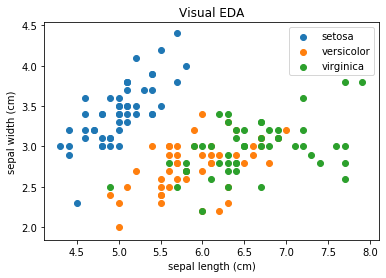

In [30]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]

plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA")

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two. 

**YOUR TURN:** 
* Which of the iris classes is seperable based on sepal characteristics? **SETOSA**
* Which of the iris classes is not? **VERSICOLOR AND VIRGINICA**
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not? **NO WE CANNOT, SINCE THE PLOT WITLL CONTAIN WAY TOO MANY DATA POINTS W.R.T EACH CLASS, MAKING IT EXTREMELY HARD TO VISUALIZE**

### Creating a Nearest Neighbors Classifier

Now that we've explored the data a little bit, we're going to use scikit-learn to create a nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we load the nearest neighbor library from scikit-learn:

In [31]:
from sklearn import neighbors

Now, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [32]:
X = feature_data
y = target_data

Next, we create our nearest neighbor classifier object:

In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [34]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample. 

**YOUR TURN:**
* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? What is its name? **2 - VERSICOLOR**
* Do you think this model is overfit or underfit to the iris dataset? Why? **Overfit, as k was chosen arbitrarily as 1 without performing a grid fold cross validation (cross validation with hyperparameter tuning)/furthermore, we did not perform a train test split, so the data that was used to train the model was also used to test the performance of the model - thereby, not reflecting the true performance**
* How many neighbors does our model consider when classifying a new sample? **ONE**

In [35]:
knn.predict([[3,4,5,2]])

array([2])

As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

**YOUR TURN:**
* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be? **100%**

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [36]:
accuracy = np.sum(target_data == knn.predict(feature_data)) / target_data.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


and then using scikit-learn's customized function:

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_data, knn.predict(feature_data))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:** 
* Why do you think the model was able to achieve such a "great" result? **THE MODEL ENDED UP GETTING AN ACCURACY OF 100% BECAUSE THE DATA THAT WAS USED TO TRAIN THE MODEL, WAS USED TO TEST THE PERFORMANCE OF THE MODEL AS WELL. AS THERE WAS NO TRAIN/TEST SPLIT, THIS LED TO AN ACCURACY OF 100%**
* What does this really tell us? **THIS ELUCIDATES THE FACT THAT THE MODEL WOULD POTENTIALLY NOT BE ABLE TO PERFORM WELL ON DATA POINTS/FEATURE DATA THAT IT HAS NEVER SEEN BEFORE.**
* Do you expect the model to perform this well on new data? **NO IT WILL NOT PERFORM THIS WELL ON UNKNOWN DATA POINTS - A CLEAR CASE OF OVERFITTING AS OUR MODEL MEMORIZED THE TRENDS/KEY PATTERNS IN THE DATA RATHER THAN LEARNING ON HOW TO GENERALIZE THOSE TRENDS/PATTERNS**

## Exercise (to be completed on your own)

Let's take the tools we have learned in this lab and put them into practice on a new dataset.

We're going to work with a dataset focused on diabetes. It contains a variety of health metrics for a number of patients, and then in a second object it shows whether or not that patient had diabetes. Download it using the cell below:

In [38]:
from sklearn.datasets import fetch_openml

diabetes_data = fetch_openml(
    name='diabetes',
    cache=False
)

First off, take a look at the `data`, `target` and `feature_names` entires in the `diabetes_data` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `diabetes_df` containing the data and the targets, with the feature names as column headings. If you need help, refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more detail on how to achieve this.

* What was the average age of participants? **33.24** [0.5]
* How many participants tested positive? How many tested negative? **POSITIVE: 268 -- NEGATIVE: 500** [0.5]

In [39]:
### YOUR CODE HERE
import pandas as pd
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df['Target'] = diabetes_data.target


#What was the average age of participants?
avg_age = diabetes_df['age'].mean()
print("What was the average age of participants?", "%.2f" % avg_age)

#How many participants tested positive? How many tested negative?
print(diabetes_df['Target'].value_counts())

What was the average age of participants? 33.24
tested_negative    500
tested_positive    268
Name: Target, dtype: int64


The targets are currently a string representing whether or not the patient has diabetes. However, it's more useful for us if this column contains a 1 or a 0 depending on whether the patient has diabetes. Use the [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class from Scikit-Learn to convert the labels into integers. [0.5]

In [40]:
from sklearn.preprocessing import LabelEncoder
### YOUR CODE HERE
le = LabelEncoder()
diabetes_df['Target'] = le.fit_transform(diabetes_df['Target'])
diabetes_df

,preg,plas,pres,skin,insu,mass,pedi,age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


Now we are going to create a classifier to predict whether a patient has diabetes based on their vitals. 

 **Note**:
 
 We should have a training, validation and test set and our main aim is to get the best accuracy on test set. While perfoming the cross-validation, the validation set is selected by the validation function each time, the input to that function should be all of dataset except your test set. 

So, a general guideline to follow will be first split the dataset into train and test (70:30), after this keep the test set aside untouched for final evaluation.
Further, in the training set depending upon the number of folds for cross validation a validation set can be obtained, the model is then iteratively trained and validated on these different sets. Basically you use your training set to generate multiple splits of the Train and Validation sets.

* Using `cross_val_score`, report mean cross validation accuracy on a KNN classifier with K=3 and 10 folds. Remember that the `target` column holds our labels

For all the cases mentioned below test accuracy should be computed and reported:

* What accuracy did the model achieve on test set?  **Accuracy of the model on the test set is: 71%** [1]
* Find a value for K that performs better than this (Note: Try for atleast first 50 values of k). 
What value for K did you use? What was the performance ? (Note: Show some Visual Depiction to compare Model performance) **k = 17, 0.76, visually depicted in the cell below** [2]

Accuracy: 0.70 (+/- 0.08)

Accuracy for K value as 1  0.68 (+/- 0.11)

Accuracy for K value as 2  0.71 (+/- 0.08)

Accuracy for K value as 3  0.70 (+/- 0.08)

Accuracy for K value as 4  0.72 (+/- 0.09)

Accuracy for K value as 5  0.72 (+/- 0.09)

Accuracy for K value as 6  0.74 (+/- 0.08)

Accuracy for K value as 7  0.74 (+/- 0.09)

Accuracy for K value as 8  0.74 (+/- 0.08)

Accuracy for K value as 9  0.74 (+/- 0.08)

Accuracy for K value as 10  0.74 (+/- 0.08)

Accuracy for K value as 11  0.74 (+/- 0.09)

Accuracy for K value as 12  0.75 (+/- 0.08)

Accuracy for K value as 13  0.74 (+/- 0.08)

Accuracy for K value as 14  0.75 (+/- 0.07)

Accuracy for K value as 15  0.74 (+/- 0.10)

Accuracy for K value as 16  0.75 (+/- 0.08)

Accuracy for K value as 17  0.76 (+/- 0.11)

Accuracy for K value as 18  0.76 (+/- 0.09)

Accuracy for K value as 19  0.75 (+/- 0.11)

Accuracy for K value as 20  0.75 (+/- 0.09)

Accuracy for K value as 21  0.75 (+/- 0.12)

Accuracy for K value as 22  0.75 (+/-

Text(0.5, 1.0, 'Comparison of Model Performance')

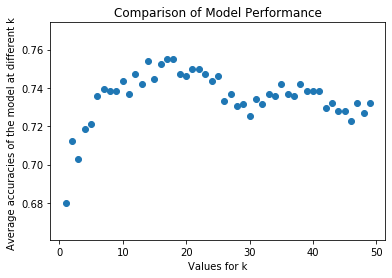

In [41]:
### YOUR CODE HERE
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split
### SPLITTING THE DATASET INTO TRAINING AND TESTING SETS (70/30 SPLIT)
X_train, X_test, y_train, y_test = train_test_split(diabetes_df, diabetes_df['Target'], test_size=0.3)
x_diab = diabetes_data.data
y_diab = diabetes_data.target

knn = neighbors.KNeighborsClassifier(n_neighbors = 3)

from sklearn.model_selection import cross_val_score
cross_scores = cross_val_score(knn, x_diab, y_diab, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_scores.mean(), cross_scores.std() * 2))

#Find a value for K that performs better than this. What value for K did you use? What was the performance?

k_val = 1
x_k = []
y_acc = []
while k_val < 50:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k_val)
    from sklearn.model_selection import cross_val_score
    cross_scores1 = cross_val_score(knn, x_diab, y_diab, cv=10)
    print("\nAccuracy for K value as", k_val, " %0.2f (+/- %0.2f)" % (cross_scores1.mean(), cross_scores1.std() * 2))
    x_k.append(k_val)
    y_acc.append(cross_scores1.mean())
    k_val += 1

### FITTING THE KNN CLASSIFIER WITH K = 17 AND REPORTING THE ACCURACY ON THE TEST SET
knn_final = neighbors.KNeighborsClassifier(n_neighbors = 17)
model = knn_final.fit(X_train, y_train)
predictions = knn_final.predict(X_test)
print('Accuracy on the test set is: ',metrics.accuracy_score(y_test, predictions))
old_accuracy = metrics.accuracy_score(y_test, predictions)

### VISUAL DEPICTION OF THE HYPERPARAMETER TUNING PERFORMED WITH 10 FOLD CROSS VALIDATION - TO CHOOSE THE OPTIMAL VALUE FOR K FOR THE KNN CLASSIFIER
plt.scatter(x_k,y_acc)
plt.xlabel("Values for k")
plt.ylabel("Average accuracies of the model at different k ")
plt.title("Comparison of Model Performance")

Take a look at the `skin` feature.

* According to the dataset description in `diabetes_data['DESCR']`, what does this feature represent? **Triceps skin fold thickness (mm)\n** [0.25]
* Are there any unusual entries in this column? If so, why? **Yes, contains a lot of missing values which have been given a value of 0.00** [0.25]

Use the `SimpleImputer` class from scikit-learn to impute missing values for the `skin` and `insu` columns. Overwrite the existing `skin` and `insu` columns with these new values.[1]

In [42]:
### YOUR CODE HERE

diabetes_data['DESCR']
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=0,
    strategy='mean',
    verbose=1
)

imp.fit(
    diabetes_df['skin'].values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

diabetes_df['skin'] = imp.transform(diabetes_df['skin'].values.reshape((-1,1)))


imp1 = SimpleImputer(
    missing_values=0,
    strategy='mean',
    verbose=1
)

imp1.fit(
    diabetes_df['insu'].values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

diabetes_df['insu'] = imp1.transform(diabetes_df['insu'].values.reshape((-1,1)))


diabetes_df


,preg,plas,pres,skin,insu,mass,pedi,age,Target
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


Re-split the data and fit a new classifier. [2.5]


Note: Test accuracy should be computed and reported below
**TEST ACCURACY POST IMPUTATION IS: 76.19%**
* Is performance better or worse with imputed values? Why might this be? (Note: Show some Visual Depiction to compare Model performance) **THE PERFORMANCE OF THE NEW CLASSIFIER WITH K=17 IMRPOVED. THE ACCURACY IS 76.19% AS COMPARED TO THE 71% WE GOT PREVIOUSLY. IMPUTING THE MISSING VALUES DEFINITELY IMPROVED THE PERFORMANCE OF THE MODEL AS THERE ARE NO MISSING VALUES/NANS ANYMORE.** 


Accuracy on the test set is:  0.7619047619047619


Text(0.5, 1.0, 'Comparison of Model Performance')

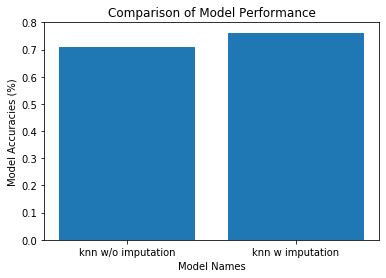

In [43]:
### YOUR CODE HERE
X_train_1,X_test_1, y_train_1, y_test_1 = train_test_split(diabetes_df, diabetes_df['Target'], test_size=0.3)
knn_final_new = neighbors.KNeighborsClassifier(n_neighbors = 17)
model_new = knn_final_new.fit(X_train_1, y_train_1)
predictions_new = knn_final_new.predict(X_test_1)
print('Accuracy on the test set is: ',metrics.accuracy_score(y_test_1, predictions_new))
new_accuracy = metrics.accuracy_score(y_test_1, predictions_new)

##VISUAL DEPICTION
model_names = ['knn w/o imputation', 'knn w imputation']
model_acc = [old_accuracy, new_accuracy]
plt.bar(model_names, model_acc)
plt.xlabel("Model Names")
plt.ylabel("Model Accuracies (%)")
plt.title("Comparison of Model Performance")

References

Train, Test and Validation set:

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

